# Merge Data with GDP

### Load Data

#### Open laws and policies

In [54]:
#Default file reader
f = open("LAP.csv", "r")
df = []
headers = f.readline()
line = f.readline()
while line:
    line = line.strip().split(",")
#     new_line = []
#     new_line.append(line[2])
#     new_line.append(line[1])
#     new_line.append(line[5])
#     new_line.append(line[7])
#     new_line.append(line[9])
    df.append(line)
    line = f.readline()
f.close()

In [ ]:
print(df)

#### Open GDP

In [56]:
#Default file reader
f = open("GDP.csv", "r")
gdp_df = []
headers = f.readline()
line = f.readline()
while line:
    line = line.strip().split(",")
    gdp_df.append(line)
    line = f.readline()
f.close()

In [ ]:
print(gdp_df)

#### Observe data in pandas data frame

In [58]:
import pandas as pd
x = pd.DataFrame(df, columns=['Title', 'Type', 'Geography', 'Geography ISO', 'Frameworks', 'Responses',
                                 'Instruments', 'Document Types','Natural Hazards', 'Keywords', 'Sectors', 'Events'])

In [59]:
x.head()

,Title,Type,Geography,Geography ISO,Frameworks,Responses,Instruments,Document Types,Natural Hazards,Keywords,Sectors,Events
0,Energy Sector Strategy 1387-1391 (2007/8-2012/3),executive,Afghanistan,AFG,,Mitigation,Developing plans and strategies|Governance and...,Strategy,,Energy Supply,Energy,25/12/2008|Law passed
1,Rural Renewable Energy Policy (RREP),executive,Afghanistan,AFG,,Adaptation,Standards and obligations|Regulation;Subsidies...,Policy,,Adaptation; Energy Supply,Energy,25/12/2013|Law passed||
2,National Forestry Management Policy (NFMP),executive,Afghanistan,AFG,,Adaptation; Mitigation,Research and development|Capacity-building,Policy,,Research And Development,Economy-wide,25/12/2007|Law passed||
3,Strategic National Action Plan for Disaster Ri...,executive,Afghanistan,AFG,Drm/Drr,Adaptation; Disaster Risk Management,Knowledge generation|Capacity-building;Designi...,Plan,Earthquake; Flood; Glacial Melt; Drought; Wild...,Adaptation,,25/12/2011|Law passed||
4,The National Environmental Action Plan (NEAP),executive,Afghanistan,AFG,,Adaptation,,Plan,,Adaptation,,25/12/2009|Law passed||


In [60]:
y = pd.DataFrame(gdp_df, columns=['Country', 'Geography ISO', 'GDPpc', 'x'])

In [61]:
y.head()

,Country,Geography ISO,GDPpc,x
0,Africa Eastern and Southern,AFE,1442.74831,None
1,Afghanistan,AFG,529.7412103,None
2,Africa Western and Central,AFW,1788.644061,None
3,Angola,AGO,3168.253873,None
4,Albania,ALB,4390.060189,None


In [62]:
y = y[['Geography ISO', 'GDPpc']]

In [63]:
y.head()

,Geography ISO,GDPpc
0,AFE,1442.74831
1,AFG,529.7412103
2,AFW,1788.644061
3,AGO,3168.253873
4,ALB,4390.060189


#### Merge two tables using Geography ISO

In [64]:
df_merge = pd.merge(x, y, how='inner')
df_merge.head()

,Title,Type,Geography,Geography ISO,Frameworks,Responses,Instruments,Document Types,Natural Hazards,Keywords,Sectors,Events,GDPpc
0,Energy Sector Strategy 1387-1391 (2007/8-2012/3),executive,Afghanistan,AFG,,Mitigation,Developing plans and strategies|Governance and...,Strategy,,Energy Supply,Energy,25/12/2008|Law passed,529.7412103
1,Rural Renewable Energy Policy (RREP),executive,Afghanistan,AFG,,Adaptation,Standards and obligations|Regulation;Subsidies...,Policy,,Adaptation; Energy Supply,Energy,25/12/2013|Law passed||,529.7412103
2,National Forestry Management Policy (NFMP),executive,Afghanistan,AFG,,Adaptation; Mitigation,Research and development|Capacity-building,Policy,,Research And Development,Economy-wide,25/12/2007|Law passed||,529.7412103
3,Strategic National Action Plan for Disaster Ri...,executive,Afghanistan,AFG,Drm/Drr,Adaptation; Disaster Risk Management,Knowledge generation|Capacity-building;Designi...,Plan,Earthquake; Flood; Glacial Melt; Drought; Wild...,Adaptation,,25/12/2011|Law passed||,529.7412103
4,The National Environmental Action Plan (NEAP),executive,Afghanistan,AFG,,Adaptation,,Plan,,Adaptation,,25/12/2009|Law passed||,529.7412103


# Piechart/Table Any Column of Laws and Policies Data

#### Function definitions

In [74]:
def expand_col(df,by_col, split_col):
    df = np.array(df)
    unique_by_col = np.unique(df[:,by_col])
    unique_split_col = np.unique(df[:,split_col])
    new_df = []
    headers = []
    headers.append('Country')
    for i in range(len(unique_split_col)):
        headers.append(unique_split_col[i])
    new_df.append(headers)
    for i in range(len(unique_by_col)):                    #i - by unique country
        curr_by_col = unique_by_col[i]
        row = []
        row.append(curr_by_col)
        for j in range(len(unique_split_col)):             #j - by unique column value
            curr_by_split = unique_split_col[j]
            n = 0
            for k in range(len(df)):                            #k - over the whole data
                if(curr_by_col == df[k][by_col] and curr_by_split == df[k][split_col]):
                    n = n + 1
            row.append(n)
        new_df.append(row)
    return new_df

In [75]:
def break_headers(df):
    df = np.array(df)
    headers = df[0,:]
    new_df = []
    for i in range(len(df) - 1):
        new_df.append(df[i + 1])
    return headers, new_df

In [76]:
def mash_line(ls_col):
    line = str(ls_col[0])
    for i in range(len(ls_col) - 1):
        line = line + ";" + str(ls_col[i+1])
    line = line.split(";")
    for i in range(len(line)):
        line[i] = (line[i]).strip()
    line = [string for string in line if string != ""]
#     seriespd, lsn = np.unique(pd.Series(line), return_counts=True)
    return np.unique(pd.Series(line), return_counts=True)

In [77]:
def print_pie(x,y,title, xlab):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 6), dpi=100)
    plt.pie(x, labels=y, autopct='%1.1f%%', labeldistance=1.2)
    plt.title(title)
    plt.xlabel(xlab)
    plt.show()

In [88]:
def country_match(country, ls_country):
    match = False
    for i in range(len(ls_country)):
        if(country.upper() == ls_country[i].upper()):
            match = True
    return match

In [89]:
def read_file(file_string):
    f = open(file_string, "r")
    df = []
    headers = f.readline()
    line = f.readline()
    while line:
        line = line.strip().split(",")
        df.append(line)
        line = f.readline()
    f.close()
    return df

#### Main

In [94]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def main():
    col_type = int(input("Select a column...\n'(?)' indicates an unintuitive selection\n\t1.Title(?)\n\t2.Type\n\t3.Geography(?)\n\t4.Geography ISO(?)\n\t5.Frameworks\n\t6.Responses\n\t7.Instruments\n\t8.Document Types\n\t9.Natural Hazards\n\t10.Keywords\n\t11.Sectors\n\t12.Events(?)\nYour selection:"))
    if(col_type < 1 or col_type > 12):
        print("ERROR: Not a valid column selection")
        return
    selection = int(input("Do you want to see...\n\t1.A pie chart for an individual country\n\t2.A table for all countries\nYour selection:"))
    if(selection < 1 or selection > 2):
        print("ERROR: Not a valid piechart/table selection")
        return
    
    df = read_file("LAP.csv")
    
    if(selection == 1):
        country = input("Select a country...\nYour selection:")
        df = np.array(df)
        
        if(not country_match(country,df[:,2])):
            print("ERROR: Not a country")
            return
        
        for i in range(len(df)):
            if(df[i][0].upper() == country.upper()):
                countrydf.append(df[i][col_type])
        ls, lsn = mash_line(df[:,int(col_type-1)])
        ls_header = ['Title', 'Type', 'Geography', 'Geography ISO', 'Frameworks', 'Responses', 'Instruments', 'Document Types','Natural Hazards', 'Keywords', 'Sectors', 'Events']
        print_pie(lsn, ls, str(country) + " " + str(ls_header[col_type - 1]), "n="+str(sum(lsn)))
    elif(selection == 2):
        new_df = expand_col(df,2,int(col_type - 1))
        pddf = pd.DataFrame(data = (break_headers(new_df))[1], columns = (break_headers(new_df))[0])
        display(pddf)

Select a column...
'(?)' indicates an unintuitive selection
	1.Title(?)
	2.Type
	3.Geography(?)
	4.Geography ISO(?)
	5.Frameworks
	6.Responses
	7.Instruments
	8.Document Types
	9.Natural Hazards
	10.Keywords
	11.Sectors
	12.Events(?)
Your selection: 2
Do you want to see...
	1.A pie chart for an individual country
	2.A table for all countries
Your selection: 1
Select a country...
Your selection: CHINA


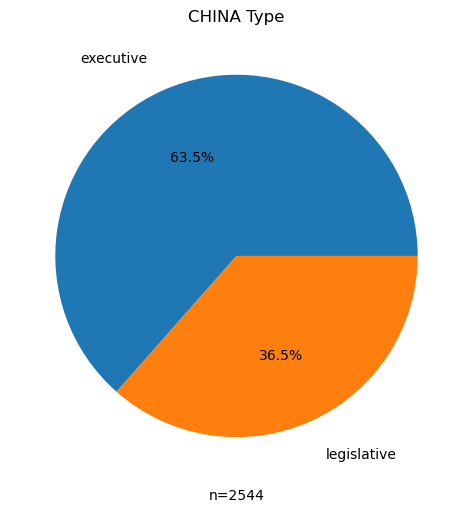

In [95]:
main()